In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

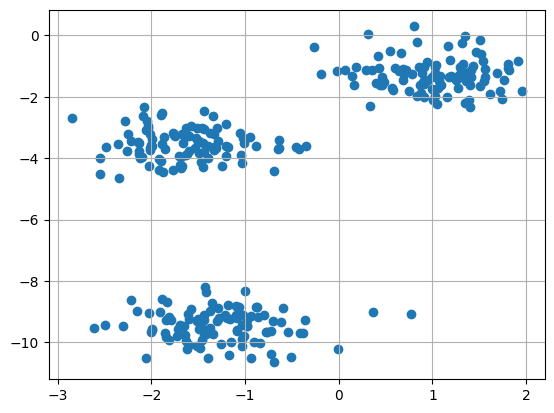

In [38]:
X, y = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=2)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

**Parameters**

In [39]:
eps = 0.3
min_pts = 5
k = 4

**Distance Function**



In [40]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

**Record Neighbors**

*We need a function to find all the points in the dataset that are within eps distance from a given point.*



In [41]:
def get_neighbors(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

**Expand Cluster**

*This function will expand the cluster from a given point and its neighbors, marking points as part of a cluster or noise.*

In [42]:
def expand_cluster(X, labels, point_idx, cluster_id, eps, min_pts):
    neighbors = get_neighbors(X, point_idx, eps)

    if len(neighbors) < min_pts:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        for neighbor_idx in neighbors:
            if labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                expand_cluster(X, labels, neighbor_idx, cluster_id, eps, min_pts)
        return True


**Main DBSCAN Function**

In [43]:
def dbscan(X, eps, min_pts):
    labels = np.zeros(len(X))  # Initialize labels as 0 (unvisited)
    cluster_id = 0

    for point_idx in range(len(X)):
        if labels[point_idx] == 0:  # Only unvisited points
            if expand_cluster(X, labels, point_idx, cluster_id + 1, eps, min_pts):
                cluster_id += 1

    return labels

# **Lets try how it works**

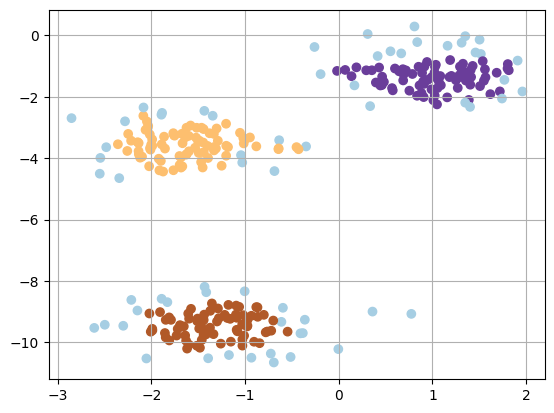

In [44]:
labels = dbscan(X, eps, min_pts)

# Plot the results
fig = plt.figure(1)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='Paired')
plt.show()

**The light blue ones are the outliers**